In [14]:
import tensorflow as tf 
import numpy as np 
import pandas as pd 
from pylab import rcParams
import matplotlib.pyplot as plt 
import warnings 
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout , Dense
from tensorflow.keras.callbacks import EarlyStopping 
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns 


In [3]:
X , y = make_circles(n_samples=100 , noise=0.1 , random_state=1)

<Axes: >

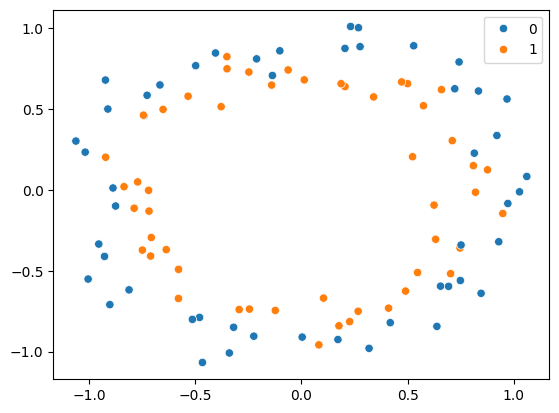

In [12]:
# sns.scatterplot(X[:,0],X[:,1],hue=y)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

In [13]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=2)

In [16]:
model = Sequential()

model.add(Dense(256 ,input_dim = 2, activation= 'relu'))
model.add(Dense(1 , activation = 'sigmoid'))

/home/aman/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-01-14 15:12:32.209384: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [17]:
model.compile(loss='binary_crossentropy' , optimizer='Adam' , metrics=['accuracy'])

In [18]:
hist = model.fit(X_train , y_train , validation_data=(X_test , y_test) , epochs=3500 , verbose=0)

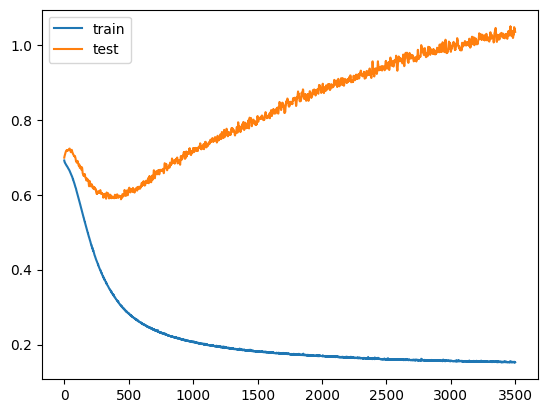

In [19]:
plt.plot(hist.history['loss'] , label = 'train')
plt.plot(hist.history['val_loss'] , label = 'test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 5s 519us/step


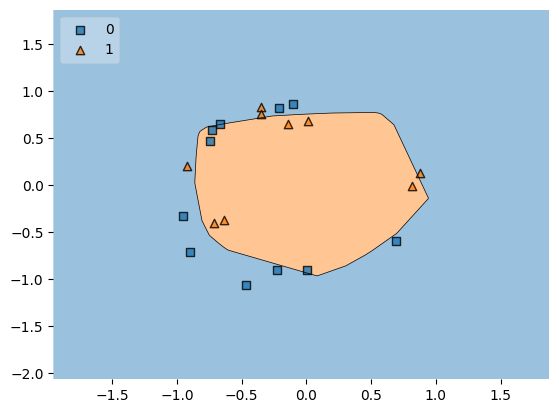

In [20]:
plot_decision_regions(X_test , y_test.ravel() , clf=model , legend=2)
plt.show()

## Early Stopping
 

In [21]:
model = Sequential()
model.add(Dense(256 , input_dim = 2 , activation='relu'))
model.add(Dense(1 , activation='sigmoid'))


/home/aman/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(loss = 'binary_crossentropy' , optimizer='adam' , metrics=['accuracy'])

In [29]:
callback = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.00001,
    patience = 20 , 
    verbose = 1 ,
    mode ='auto',
    baseline = None ,
    restore_best_weights = False
)

In [30]:
hist = model.fit(X_train , y_train , validation_data=(X_test , y_test) , epochs=3500 , callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6172 - loss: 0.6469 - val_accuracy: 0.3500 - val_loss: 0.7169
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6406 - loss: 0.6511 - val_accuracy: 0.4000 - val_loss: 0.7161
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6836 - loss: 0.6348 - val_accuracy: 0.4500 - val_loss: 0.7146
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6391 - loss: 0.6519 - val_accuracy: 0.4500 - val_loss: 0.7112
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5984 - loss: 0.6529 - val_accuracy: 0.5000 - val_loss: 0.7079
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6609 - loss: 0.6446 - val_accuracy: 0.6000 - val_loss: 0.7063
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6336 - loss: 0.6451 - val_accuracy: 0.6000 - val_loss: 0.7052
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6516 - loss: 0.6449 - val_accuracy: 0.6000 - v

[]

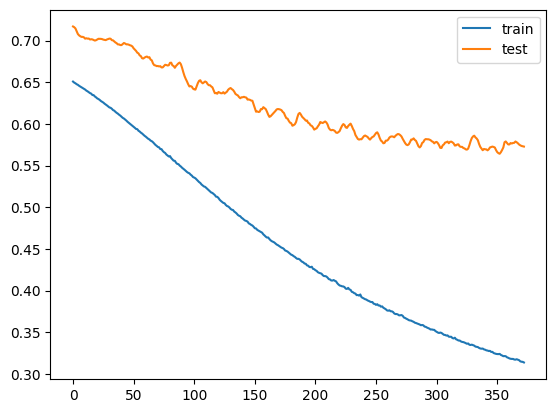

In [31]:
plt.plot(hist.history['loss'] , label = 'train')
plt.plot(hist.history['val_loss'] , label = 'test')
plt.legend()
plt.plot()